<a href="https://colab.research.google.com/github/Karthikard/DL/blob/main/5_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np


In [5]:
df = pd.read_csv('5_Customer-Churn.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [6]:
df.drop('customerID' , axis='columns' , inplace=True)

In [7]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [8]:
df.TotalCharges.values    #it is string neeed to convert

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [10]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [12]:
df[pd.to_numeric(df.TotalCharges , errors= 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [14]:
df1.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [15]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

/tmp/ipython-input-695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [16]:
df1.TotalCharges.dtypes

dtype('float64')

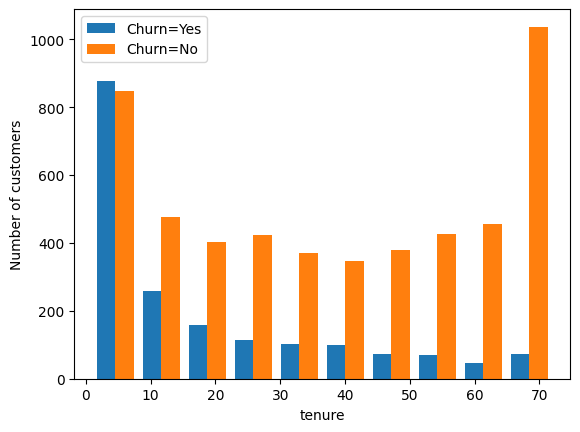

In [17]:
tenure_churn_no = df1[df1.Churn == "No"].tenure
tenure_churn_yes = df1[df1.Churn == "Yes"].tenure

plt.hist([tenure_churn_yes,tenure_churn_no],label=["Churn=Yes","Churn=No"])
plt.legend()
plt.xlabel("tenure")
plt.ylabel("Number of customers")


plt.show()

In [18]:
len(df1[df1.Churn == "No"])

5163

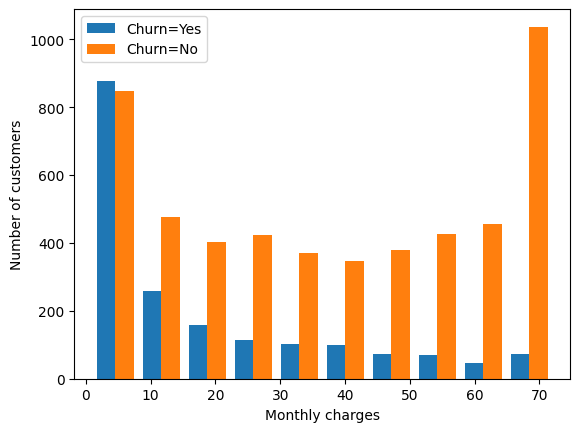

In [19]:
mc_churn_no = df1[df1.Churn == "No"].tenure
mc_churn_yes = df1[df1.Churn == "Yes"].tenure

plt.hist([mc_churn_yes,mc_churn_no],label=["Churn=Yes","Churn=No"])
plt.legend()
plt.xlabel("Monthly charges")
plt.ylabel("Number of customers")


plt.show()

In [20]:
def print_unique_col_values(df):
  for column in df1:
    if(df[column].dtypes == 'object'):
      print(f'{column} : {df[column].unique()}')


In [21]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [22]:
df1.replace('No internet service' , 'No' , inplace=True)
df1.replace('No phone service' , 'No' , inplace=True)

/tmp/ipython-input-928069211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service' , 'No' , inplace=True)
/tmp/ipython-input-928069211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service' , 'No' , inplace=True)


In [23]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [24]:
yes_no_columns = ['Partner' , 'Dependents' , 'PhoneService' , 'MultipleLines' , 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'StreamingMovies' , 'PaperlessBilling' , 'Churn']

In [25]:
for col in yes_no_columns:
  df1[col].replace({'Yes' : 1 , 'No' : 0} , inplace=True)

/tmp/ipython-input-136346432.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes' : 1 , 'No' : 0} , inplace=True)
/tmp/ipython-input-136346432.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes' : 1 , 'No' : 0} , inplace=True)
/tmp/ipython-input-1363464

In [26]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [27]:
df1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1


In [28]:
df1['gender'].replace({'Female' : 1 , 'Male' : 0} , inplace=True)
df1['gender'].unique()

/tmp/ipython-input-1341127139.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female' : 1 , 'Male' : 0} , inplace=True)
/tmp/ipython-input-1341127139.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female' : 1 , 'Male' : 0} , inplace=True)
/tmp

array([1, 0])

In [29]:
df1['gender'].head(4)

,gender
0,1
1,0
2,0
3,0


In [30]:
pd.get_dummies(df1 , columns=['InternetService' , 'Contract' , 'PaymentMethod'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,True,False,False,False,True,False,False,False,False,True
7039,1,0,1,1,72,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
7040,1,0,1,1,11,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True


In [31]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
341,1,0,1,0,71,1,1,DSL,1,1,1,1,1,1,Two year,0,Credit card (automatic),85.75,6223.80,0
4565,1,0,1,0,71,0,0,DSL,1,1,1,1,1,1,One year,0,Bank transfer (automatic),66.80,4689.15,0
4487,0,0,1,1,4,1,1,No,0,0,0,0,0,0,One year,0,Credit card (automatic),24.10,73.10,0
1375,1,0,1,1,39,1,0,No,0,0,0,0,0,0,Two year,1,Bank transfer (automatic),19.85,854.80,0
4656,1,0,1,1,22,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),75.80,1615.10,0


Scaling

In [33]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [34]:
cols_to_scale = ['tenure' , 'MonthlyCharges' , 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

/tmp/ipython-input-1256419643.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])


In [35]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6357,0,0,1,0,0.901408,1,1,Fiber optic,1,1,1,0,0,0,One year,0,Electronic check,0.711443,0.663605,1
6660,0,0,1,0,0.000000,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,0.506468,0.005810,1
6486,1,0,1,0,0.056338,1,1,DSL,0,0,1,1,1,0,Month-to-month,0,Bank transfer (automatic),0.494527,0.038253,1
1932,0,0,0,0,0.000000,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,0.019403,0.000162,0
2639,0,0,0,0,0.295775,1,1,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,0.360199,0.127919,1


In [36]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0.000000,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,0.115423,0.001275,0
1,0,0,0,0,0.464789,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,0.385075,0.215867,0
2,0,0,0,0,0.014085,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,0.354229,0.010310,1
3,0,0,0,0,0.619718,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),0.239303,0.210241,0
4,1,0,0,0,0.014085,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,0.521891,0.015330,1


In [37]:
X = pd.get_dummies(df1.drop('Churn', axis='columns'), columns=['InternetService' , 'Contract' , 'PaymentMethod'])
y = df1['Churn']

In [38]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [39]:
X_train.shape

(5625, 26)

In [40]:
len(X_train.columns)

26

In [41]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26 , input_shape = (26 ,), activation='relu'),
    keras.layers.Dense(10, activation = 'relu'),
    keras.layers.Dense(1 , activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7386 - loss: 0.5359
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7847 - loss: 0.4367
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7928 - loss: 0.4281
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7989 - loss: 0.4228
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7980 - loss: 0.4204
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8014 - loss: 0.4193
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8067 - loss: 0.4057
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8053 - loss: 0.4128
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8041 - loss: 0.4130
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8089 - loss: 0.4093
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8007 - loss: 0.4170
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [43]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7842 - loss: 0.4215


[0.43429237604141235, 0.7867803573608398]

In [44]:
yp = model.predict(X_test)
yp[:3]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.00416557],
       [0.00550594],
       [0.09711052]], dtype=float32)

In [45]:
y_test[:3]

,Churn
5401,0
1681,0
2076,0


In [46]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [47]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [48]:
y_test[:10]

,Churn
5401,0
1681,0
2076,0
3359,0
6629,0
149,0
1730,1
5971,0
3050,1
1183,0


In [49]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1046
           1       0.59      0.54      0.57       361

    accuracy                           0.79      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

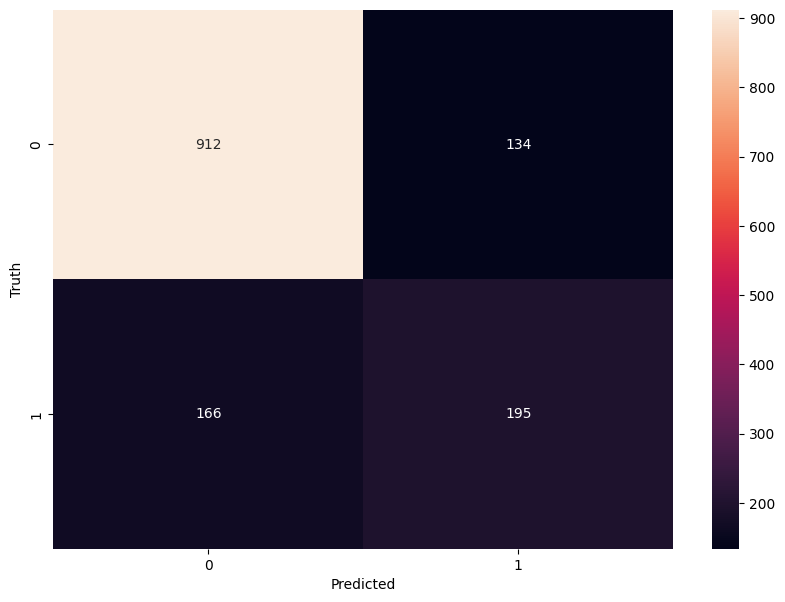

In [50]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Imbalance Dataset**

In [51]:
y_test.value_counts()

,count
Churn,
0,1046
1,361


Undersamping majority class

In [52]:
count_class_0, count_class_1 = df1.Churn.value_counts()

df_class_0 = df1[df1['Churn'] == 0]
df_class_1 = df1[df1['Churn'] == 1]

In [58]:
count_class_0, count_class_1

(5163, 1869)

In [53]:
df_class_0.shape

(5163, 20)

In [54]:
df_class_1.shape

(1869, 20)

In [56]:
df_class_0.sample(count_class_1).shape

(1869, 20)

In [61]:
#random under sampling
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under=pd.concat([df_class_0_under , df_class_1] , axis=0)

df_test_under.Churn.value_counts()

,count
Churn,
0,1869
1,1869


In [65]:
x = df_test_under.drop('Churn' , axis=1)
y = df_test_under.Churn

x = pd.get_dummies(x, columns=['InternetService' , 'Contract' , 'PaymentMethod'])

In [68]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10 , stratify=y)

In [ ]:
#y_pred = model.fit(X_train, y_train, epochs=100)
y_pred = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8251 - loss: 0.3693
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8445 - loss: 0.3507
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8288 - loss: 0.3652
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8342 - loss: 0.3531
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8298 - loss: 0.3615
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8336 - loss: 0.3511
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8516 - loss: 0.3374
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8545 - loss: 0.3414
Epoch 9/100
 1/94 ━━━━━━━━━━━━━━━━━━━━ 16s 180ms/step - accuracy: 0.8438 - loss: 0.3698

In [70]:
print(classification_report(y_test,y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [748, 1407]